# Weightlifting - Quality of Exercise
Human Activity Recognition (HAR-http://groupware.les.inf.puc-rio.br/har)

One thing that people regularly do is quantify how much of a particular activity they do, but they rarely quantify how well they do it. In this project, the goal is to analyze data from accelerometers on the belt, forearm, arm, and dumbbell of six participants. They were asked to perform barbell lifts correctly and incorrectly in five different ways.

<img src="http://groupware.les.inf.puc-rio.br/static/WLE/on-body-sensing-schema.png" width=200 />

This human activity recognition research has traditionally focused on discriminating between different activities, i.e. to predict "which" activity was performed at a specific point in time (like with the Daily Living Activities dataset above). The approach we propose for the Weight Lifting Exercises dataset is to investigate "how (well)" an activity was performed by the wearer. The "how (well)" investigation has only received little attention so far, even though it potentially provides useful information for a large variety of applications,such as sports training.

In this work the authors first define quality of execution and investigate three aspects that pertain to qualitative activity recognition: the problem of specifying correct execution, the automatic and robust detection of execution mistakes, and how to provide feedback on the quality of execution to the user. We tried out an on-body sensing approach (dataset here), but also an "ambient sensing approach" (by using Microsoft Kinect - dataset still unavailable)

Six young health participants were asked to perform one set of 10 repetitions of the Unilateral Dumbbell Biceps Curl in five different fashions: exactly according to the specification (Class A), throwing the elbows to the front (Class B), lifting the dumbbell only halfway (Class C), lowering the dumbbell only halfway (Class D) and throwing the hips to the front (Class E).

Class A corresponds to the specified execution of the exercise, while the other 4 classes correspond to common mistakes. Participants were supervised by an experienced weight lifter to make sure the execution complied to the manner they were supposed to simulate. The exercises were performed by six male participants aged between 20-28 years, with little weight lifting experience. We made sure that all participants could easily simulate the mistakes in a safe and controlled manner by using a relatively light dumbbell (1.25kg).

Read more: http://groupware.les.inf.puc-rio.br/har#ixzz54Icyrt00

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
filename = "../Datasets/WeightLiftingExercise-training.csv"
df = pd.read_csv(filename, sep=",",low_memory=False)

# We don't need the first 7 columns
ds = df.drop(df.columns[[0,1,2,3,4,5,6]],axis=1)

train, test = train_test_split(ds, test_size=0.2)

# dataset contains the source of data
dataset=test

In [3]:
dataset.head(10)

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
6009,122.00,25.80,-2.91,19,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.25,3.24,1.97,-51,-60,-184,-418,-300.0,436.0,B
15771,15.20,-4.28,-76.40,5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,-3.92,-0.16,-187,385,209,-903,1400.0,-708.0,D
14989,124.00,-42.10,166.00,17,NaN,NaN,NaN,NaN,NaN,NaN,...,0.79,1.81,0.94,-280,434,35,-663,626.0,716.0,D
3637,0.33,4.88,-87.90,4,NaN,NaN,NaN,NaN,NaN,NaN,...,0.37,-0.31,0.34,164,291,-128,37,627.0,752.0,A
17530,130.00,5.65,40.70,18,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.88,2.01,-0.15,-129,102,17,-370,750.0,558.0,E
9899,1.23,2.50,-88.40,3,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.26,-2.83,-0.07,195,190,176,381,-52.0,-134.0,C
19188,158.00,5.61,52.90,28,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,1.35,0.21,-97,174,-1,-133,721.0,500.0,E
11592,127.00,-41.40,161.00,18,NaN,NaN,NaN,NaN,NaN,NaN,...,0.77,1.93,1.21,-233,356,2,-648,635.0,681.0,C
14559,0.91,4.02,-87.50,4,NaN,NaN,NaN,NaN,NaN,NaN,...,0.14,-0.61,0.00,-120,346,-113,-556,701.0,781.0,D
18132,8.20,-5.85,-79.10,5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.77,-3.73,-0.20,-15,-141,-215,-408,-361.0,220.0,E


## High Dimensionality data
In this dataset we have 160 features which are impossible to evel look at them without getting an headache and thinking "what am I suppose to do with this?"

Each row represent data from one of the six participants in this study (here in the ouput we are seeing 'Carlitos') executing the Unilateral Dumbbell Biceps Curl in different ways (classes)

Some of the rows contains NAN values which we remove next (we will not pay much attention to keeping as much data as possible as this is a visualization example)

In [4]:
# Let's identify the features with nan values
num_rows = len (dataset)
count_nan = dataset.isnull().sum() #This is a type pandas series
count_non_nan = count_nan[count_nan==0]
print (num_rows)

3925


In [5]:
print (count_non_nan)

roll_belt               0
pitch_belt              0
yaw_belt                0
total_accel_belt        0
gyros_belt_x            0
gyros_belt_y            0
gyros_belt_z            0
accel_belt_x            0
accel_belt_y            0
accel_belt_z            0
magnet_belt_x           0
magnet_belt_y           0
magnet_belt_z           0
roll_arm                0
pitch_arm               0
yaw_arm                 0
total_accel_arm         0
gyros_arm_x             0
gyros_arm_y             0
gyros_arm_z             0
accel_arm_x             0
accel_arm_y             0
accel_arm_z             0
magnet_arm_x            0
magnet_arm_y            0
magnet_arm_z            0
roll_dumbbell           0
pitch_dumbbell          0
yaw_dumbbell            0
total_accel_dumbbell    0
gyros_dumbbell_x        0
gyros_dumbbell_y        0
gyros_dumbbell_z        0
accel_dumbbell_x        0
accel_dumbbell_y        0
accel_dumbbell_z        0
magnet_dumbbell_x       0
magnet_dumbbell_y       0
magnet_dumbb

In [6]:
# Let's remove the columns with missing values
dataset = dataset[count_non_nan.keys()]
print(dataset.shape)

(3925, 53)


In [7]:
dataset.head(5)

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
6009,122.00,25.80,-2.91,19,-0.48,0.00,-0.51,-43,72,-170,...,-1.25,3.24,1.97,-51,-60,-184,-418,-300.0,436.0,B
15771,15.20,-4.28,-76.40,5,0.08,-0.05,0.02,17,9,-45,...,0.03,-3.92,-0.16,-187,385,209,-903,1400.0,-708.0,D
14989,124.00,-42.10,166.00,17,0.13,0.11,-0.16,48,45,-157,...,0.79,1.81,0.94,-280,434,35,-663,626.0,716.0,D
3637,0.33,4.88,-87.90,4,0.13,0.02,0.02,-6,4,37,...,0.37,-0.31,0.34,164,291,-128,37,627.0,752.0,A
17530,130.00,5.65,40.70,18,0.26,0.11,-0.13,-28,65,-162,...,-0.88,2.01,-0.15,-129,102,17,-370,750.0,558.0,E


## Extracting rows as vectors
Now each row will represent a vector of 53 features (still very high dimensionality for visualization purposes)
We will also normalize the data so each feature will have mean of 0 and standard deviation of 1. For this purpose we will use the normalizer object of sklearn.

The vectors will contain all features with the exception of the 'classe' (class) feature

In [13]:
from sklearn.preprocessing import StandardScaler

X = dataset.loc[:, dataset.columns != 'classe']
X_z = X
scaler = StandardScaler()
X_z = scaler.fit_transform(X)

## t-distributed Stochastic Neighbor Embedding (t-SNE)
This is another, rather powerful, method to reduce dimensionality and in this case to just 2 dimensions by finding similarity between vectors and store this similarity in a matrix projected in 2D and used for our final representation. We will see more on this on the video lecture.

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2D = tsne.fit_transform(X_z)

In [11]:
from collections import OrderedDict
%matplotlib inline

#Plotting the result
markers =('s','d','o','^','v') 
color_map = OrderedDict((('A','red'),('B','blue'),('C','lightgreen'),('D','purple'),('E','cyan')))
color_keys = list(color_map.keys())
plt.figure()

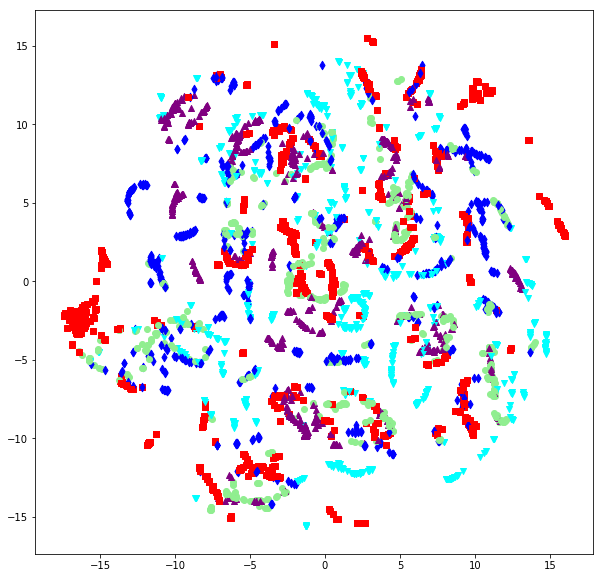

In [15]:
for elem in X_2D:
    idx = np.where(X_2D == elem)[0][0]
    classe = dataset.iloc[[idx]]['classe'].values[0]
    mIdx = color_keys.index(classe)
    plt.rcParams["figure.figsize"] = [10,10]
    plt.scatter(x=elem[0],y=elem[1], c=color_map[classe], marker=markers[mIdx], label=mIdx)